In [1]:
%pylab inline

Matplotlib is building the font cache; this may take a moment.


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
handle_excel = pd.ExcelFile("yelp.xlsx")
yelp_sheet = handle_excel.parse("yelp_data")
cities_sheet = handle_excel.parse("cities")
states_sheet = handle_excel.parse("states")
df = pd.merge(left = yelp_sheet, right = cities_sheet, how ='inner', left_on = "city_id", right_on = "id")
df = pd.merge(left=df, right = states_sheet, how ='inner', left_on ="state_id", right_on ="id")
df.head()

C:\ProgramData\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\ProgramData\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\ProgramData\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,id_x,city,id_y,state
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1,1,Bellevue,1,PA
1,Discount Tire Center,Tires,Automotive,False,24,4.5,1,1,1,Bellevue,1,PA
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1,1,Bellevue,1,PA
3,Fred Dietz Floral,Shopping,Flowers & Gifts,False,6,4.0,1,1,1,Bellevue,1,PA
4,Kuhn's Market,Food,Grocery,False,8,3.5,1,1,1,Bellevue,1,PA


In [8]:
del df['id_x']
del df['id_y']

In [10]:
df.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1,Bellevue,PA
1,Discount Tire Center,Tires,Automotive,False,24,4.5,1,1,Bellevue,PA
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1,Bellevue,PA
3,Fred Dietz Floral,Shopping,Flowers & Gifts,False,6,4.0,1,1,Bellevue,PA
4,Kuhn's Market,Food,Grocery,False,8,3.5,1,1,Bellevue,PA


In [12]:
df_pitt = df[df['city'] == 'Pittsburgh']
df_pitt.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
95,Aamco Transmissions,Auto Repair,Automotive,False,21,4.5,8,1,Pittsburgh,PA
96,Animal Rescue League Shelter & Wildlife Center,Animal Shelters,Veterinarians,False,43,4.0,8,1,Pittsburgh,PA
97,Aracri's Greentree Inn,Italian,American (New),True,15,3.5,8,1,Pittsburgh,PA
98,Atch-Mont Real Estate,Real Estate Services,Property Management,False,3,2.0,8,1,Pittsburgh,PA
99,Atria's Restaurant,American (New),Sandwiches,True,69,3.0,8,1,Pittsburgh,PA


In [13]:
df_vegas = df[df['city'] == 'Las Vegas']
df_vegas.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
430,Reliable Tax Services,Financial Services,Accountants,False,3,4.5,12,2,Las Vegas,NV
431,Paradise Electro Stimulations,Shopping,Adult,False,4,4.5,12,2,Las Vegas,NV
432,The Studio,Shopping,Adult,False,7,5.0,12,2,Las Vegas,NV
433,Boomer's Bar,Bars,American (Traditional),False,19,3.5,12,2,Las Vegas,NV
434,Omelet House,Breakfast & Brunch,American (Traditional),True,703,4.5,12,2,Las Vegas,NV


In [15]:
pitt_stars = df_pitt['stars']
vegas_stars = df_vegas['stars']
vegas_stars.head()

430    4.5
431    4.5
432    5.0
433    3.5
434    4.5
Name: stars, dtype: float64

(array([ 5.,  7., 10., 10., 19., 29., 18., 28.,  7.]),
 array([1.        , 1.44444444, 1.88888889, 2.33333333, 2.77777778,
        3.22222222, 3.66666667, 4.11111111, 4.55555556, 5.        ]),
 <BarContainer object of 9 artists>)

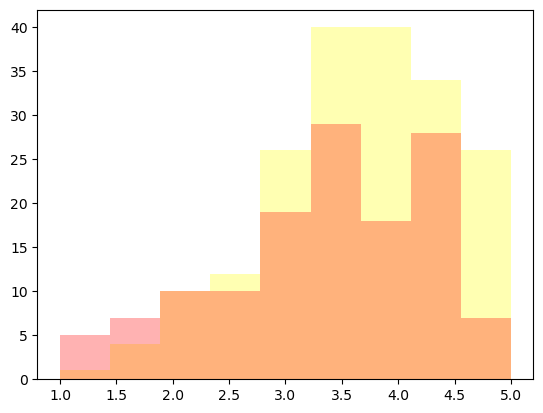

In [16]:
plt.hist(
    pitt_stars,
    alpha = 0.3,
    color = 'yellow',
    label = 'Pittsburgh',
    bins = 'auto'
)
plt.hist(
    vegas_stars,
    alpha = 0.3,
    color = 'red',
    label = 'Las Vegas',
    bins = 'auto'
)